## VISUALIZING ZONING BOARD OF APPEAL TRACKER DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
directory = '/content/drive/MyDrive/City of Boston: Permitting D/Project Files/data/cleaned_zba.csv'

In [ ]:
df = pd.read_csv(directory, encoding='utf-8')
df.head()

,status,parent_apno,boa_apno,appeal_type,submitted_date,received_date,hearing_date,ever_deferred,num_deferrals,final_decision_date,...,fd_month,fd_day,final_submitted,final_hearing,cd_year,cd_month,cd_day,closed_submitted,closed_hearing,closed_final
0,1,NaN,BOA1534017,0,2023-10-07,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,NaN,BOA1534015,0,2023-10-07,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,ALT1486864,BOA1533753,0,2023-10-06,2023-10-06,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2,ALT1527237,BOA1533784,0,2023-10-06,2023-10-06,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2,ERT1515294,BOA1533227,0,2023-10-05,2023-10-05,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               9040 non-null   int64  
 1   parent_apno          8771 non-null   object 
 2   boa_apno             9040 non-null   object 
 3   appeal_type          9040 non-null   int64  
 4   submitted_date       9040 non-null   object 
 5   received_date        8516 non-null   object 
 6   hearing_date         7874 non-null   object 
 7   ever_deferred        7874 non-null   object 
 8   num_deferrals        7874 non-null   float64
 9   final_decision_date  8289 non-null   object 
 10  decision             8289 non-null   object 
 11  closed_date          8311 non-null   object 
 12  city                 9040 non-null   object 
 13  zip                  9040 non-null   int64  
 14  ward                 9040 non-null   int64  
 15  zoning_district      9000 non-null   o

<ipython-input-15-ee48ccae367e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


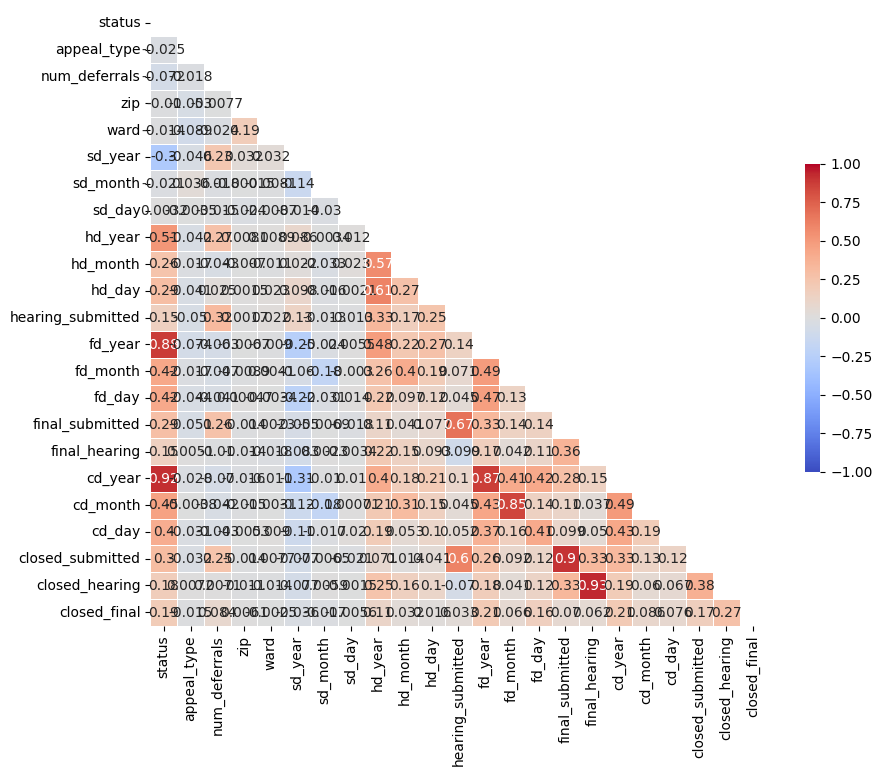

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Show the plot
plt.show()

## 1. status

The current status of the appeal.

In [ ]:
df.status.unique()

array([1, 2, 3, 7, 5, 4, 6])

In [ ]:
# {
#     'Appeal Submitted': 1,
#     'Community Process': 2,
#     'Hearing Scheduled': 3,
#     'Hearing Rescheduled': 4,
#     'Hearing Concluded': 5,
#     'ZBA Decision Finalized': 6,
#     'Appeal Closed': 7
# }

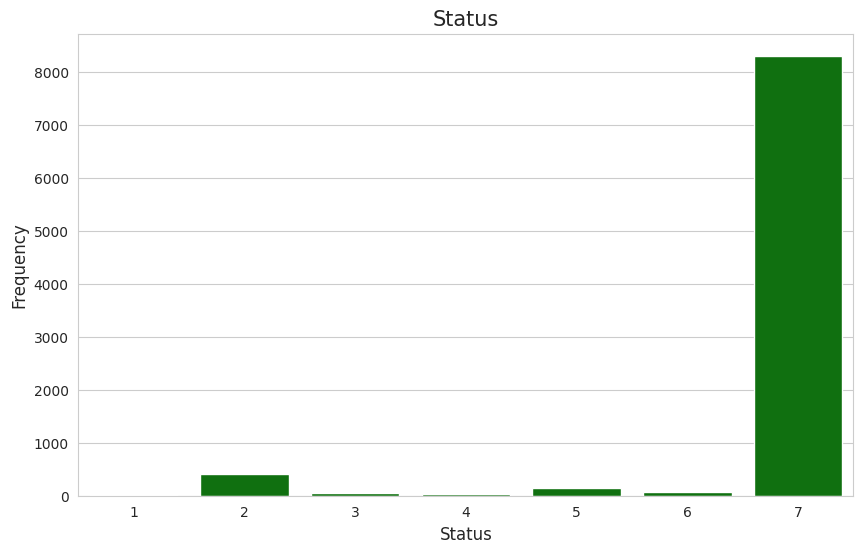

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df, color='green')

plt.title('Status', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

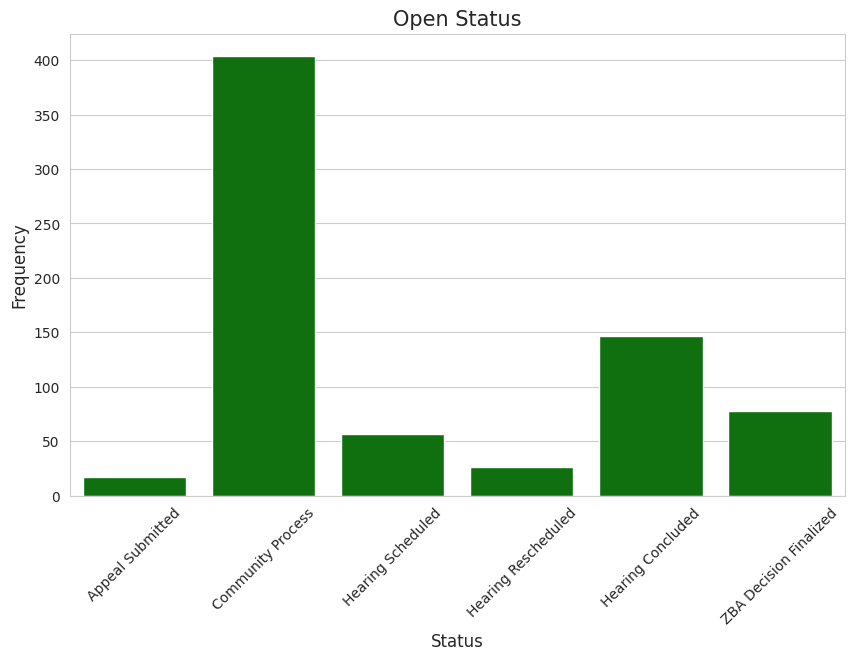

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=df.loc[df['status'] != 7], color='green')

plt.title('Open Status', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

labels_map = {
    1: 'Appeal Submitted',
    2: 'Community Process',
    3: 'Hearing Scheduled',
    4: 'Hearing Rescheduled',
    5: 'Hearing Concluded',
    6: 'ZBA Decision Finalized',
    # 7: 'Appeal Closed'
}

plt.xticks(ticks=range(6), labels=[labels_map[i+1] for i in range(6)], rotation=45)

plt.show()

## 2. appeal_type

Identifies the appeal type as Building or Zoning

In [ ]:
df.appeal_type.unique()

array([0, 1])

In [ ]:
#  {'Zoning':0, 'Building':1}

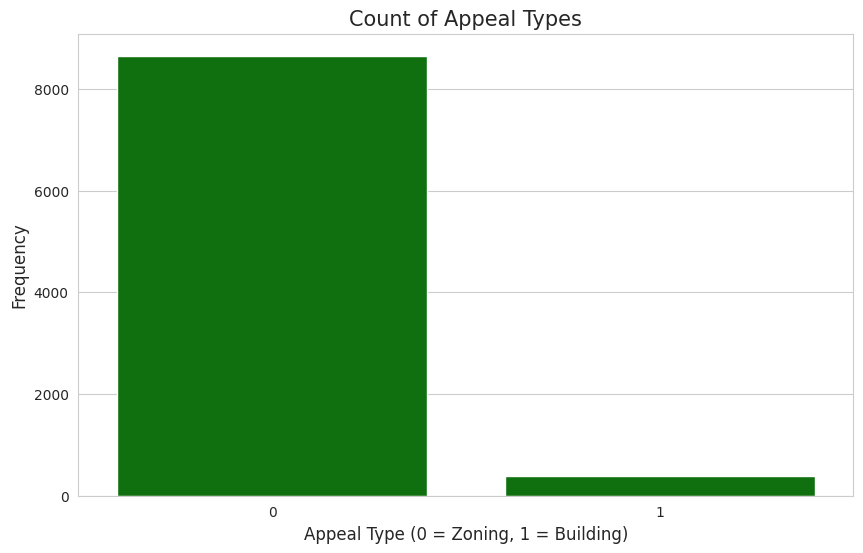

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='appeal_type', data=df, color='green')

plt.title('Count of Appeal Types', fontsize=15)
plt.xlabel('Appeal Type (0 = Zoning, 1 = Building)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## 3. submitted_date

The date the appeal was submitted; either in person, or through the online portal

In [ ]:
df.submitted_date.head()

0    2023-10-07
1    2023-10-07
2    2023-10-06
3    2023-10-06
4    2023-10-05
Name: submitted_date, dtype: object

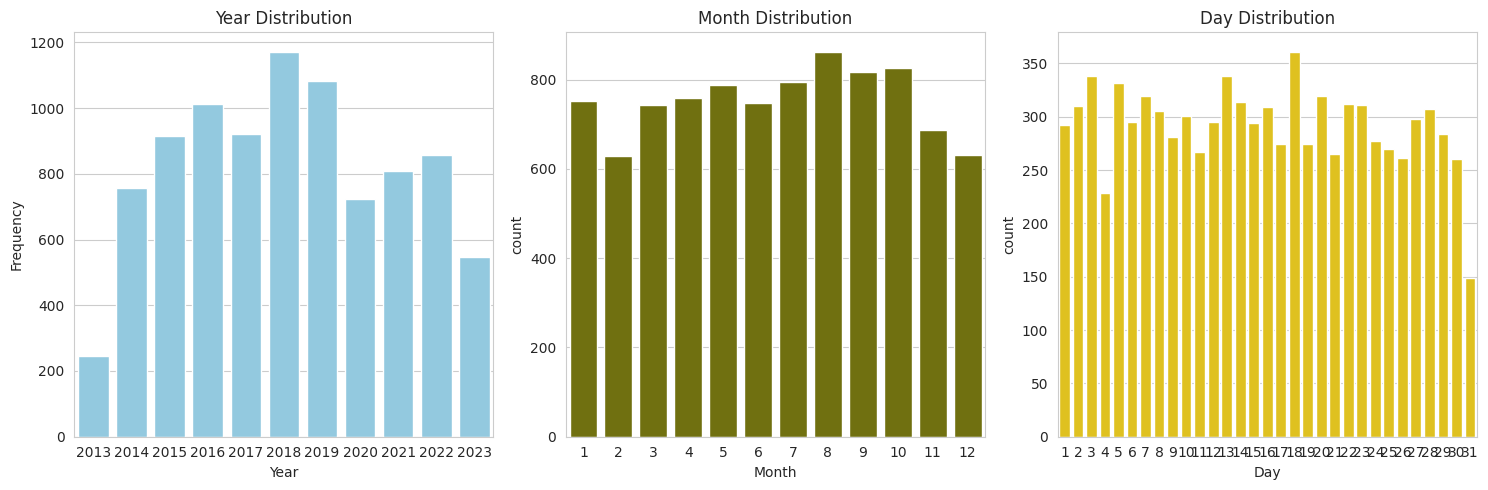

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Count plot for Year
plt.subplot(1, 3, 1)
sns.countplot(x='sd_year', data=df, color="skyblue")
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Count plot for Month
plt.subplot(1, 3, 2)
sns.countplot(x='sd_month', data=df, color="olive")
plt.title('Month Distribution')
plt.xlabel('Month')

# Count plot for Day
plt.subplot(1, 3, 3)
sns.countplot(x='sd_day', data=df, color="gold")
plt.title('Day Distribution')
plt.xlabel('Day')

plt.tight_layout()
plt.show()


## 4. hearing_date

The date of the public meeting at which the appeal will be heard by the Zoning
Board of Appeal

In [ ]:
df.hearing_date.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: hearing_date, dtype: object

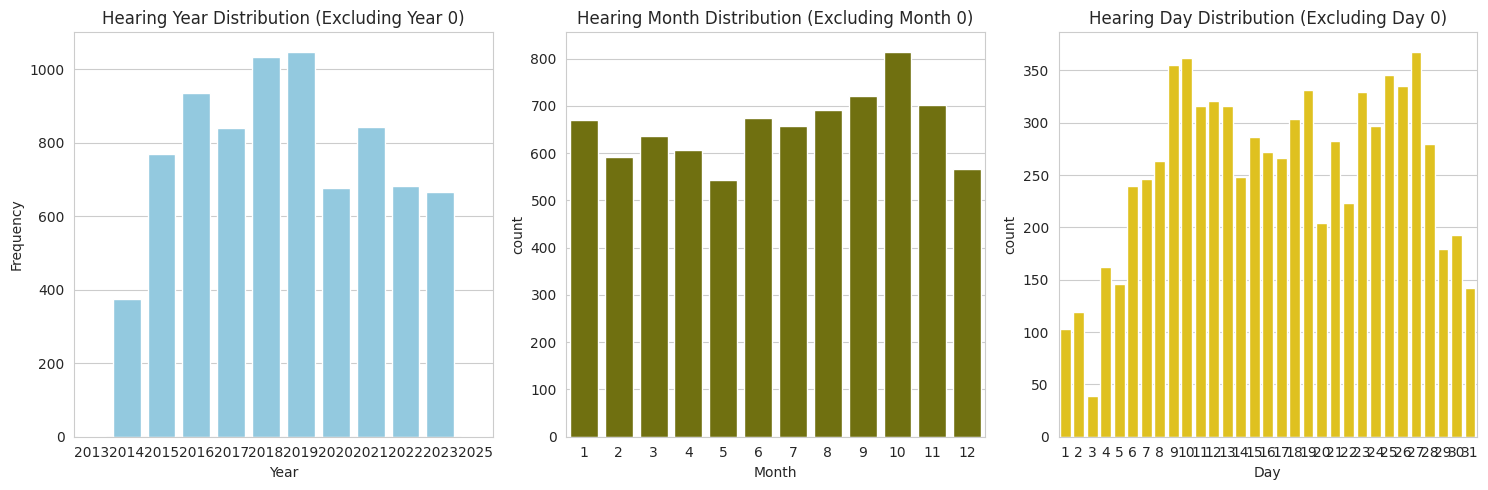

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Count plot for Hearing Date Year (excluding year 0)
plt.subplot(1, 3, 1)
sns.countplot(x='hd_year', data=df[df['hd_year'] != 0], color="skyblue")
plt.title('Hearing Year Distribution (Excluding Year 0)')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Count plot for Hearing Date Month (excluding month 0)
plt.subplot(1, 3, 2)
sns.countplot(x='hd_month', data=df[df['hd_month'] != 0], color="olive")
plt.title('Hearing Month Distribution (Excluding Month 0)')
plt.xlabel('Month')

# Count plot for Hearing Date Day (excluding day 0)
plt.subplot(1, 3, 3)
sns.countplot(x='hd_day', data=df[df['hd_day'] != 0], color="gold")
plt.title('Hearing Day Distribution (Excluding Day 0)')
plt.xlabel('Day')

plt.tight_layout()
plt.show()


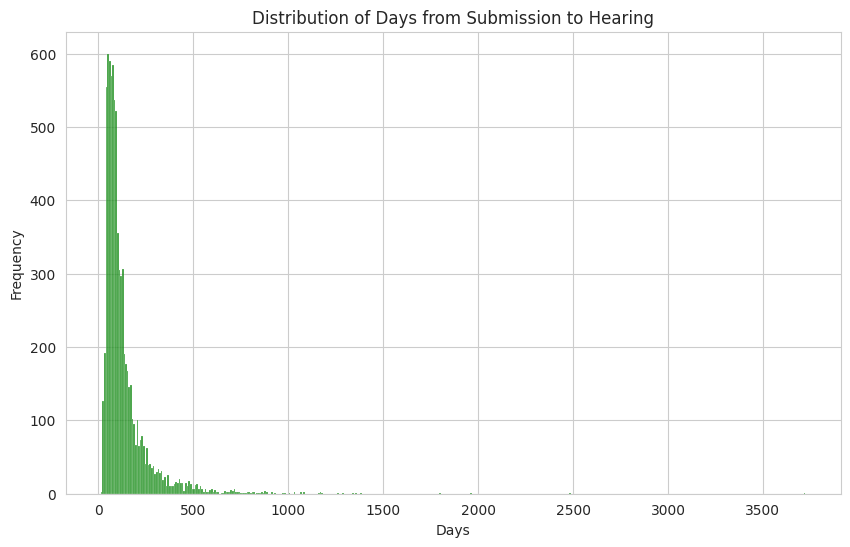

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(df.loc[df.hearing_submitted>0]['hearing_submitted'], kde=False, color="green")
plt.title('Distribution of Days from Submission to Hearing')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

## 5. ever_deferred

Yes or No. Null if the appeal has not had its first hearing scheduled yet.

In [ ]:
df.ever_deferred.unique()

array([nan, 'N', 'Y'], dtype=object)

In [ ]:
df.ever_deferred.isnull().sum()

1166

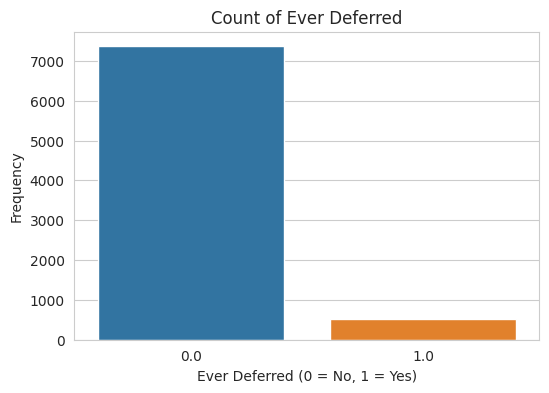

In [ ]:
# Convert 'Y' to 1, 'N' to 0
df['ever_deferred_numeric'] = df['ever_deferred'].map({'Y': 1, 'N': 0})

# If you want to exclude NaN values
df_nonan = df.dropna(subset=['ever_deferred_numeric'])

sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

# Countplot
sns.countplot(x='ever_deferred_numeric', data=df_nonan)
plt.title('Count of Ever Deferred')
plt.xlabel('Ever Deferred (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to correspond to 0 and 1
plt.show()

## 6. num_deferrals

Total times an appeal has been deferred. Null if the appeal has not had its first
hearing scheduled yet

In [ ]:
df.num_deferrals.sample(5)

2123    0.0
550     0.0
2587    3.0
3495    0.0
5027    0.0
Name: num_deferrals, dtype: float64

In [ ]:
df.num_deferrals.unique()

array([nan,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

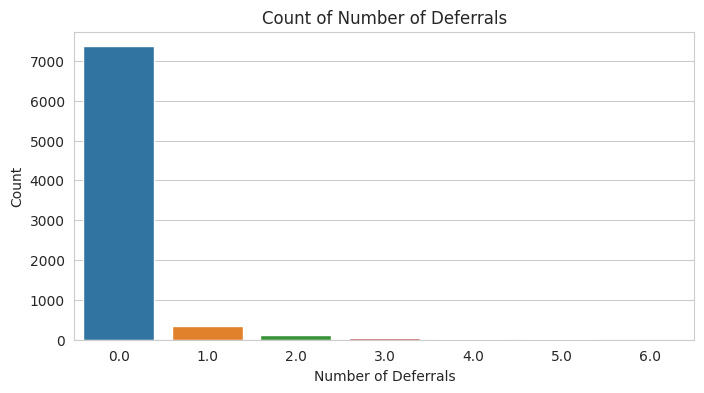

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(x='num_deferrals', data=df[df.num_deferrals.notna()])
plt.title('Count of Number of Deferrals')
plt.xlabel('Number of Deferrals')
plt.ylabel('Count')
plt.show()

## 7. final_decision_date

The date on the written ZBA decision. From this date, community members who
disagree with the ZBA's decision have twenty days to appeal in court

In [ ]:
df.final_decision_date.sample(5)

2002    2021-06-22
5831    2017-08-18
6593    2016-11-07
8454    2014-12-09
4653    2018-11-16
Name: final_decision_date, dtype: object

In [ ]:
df.final_decision_date.isnull().sum()

751

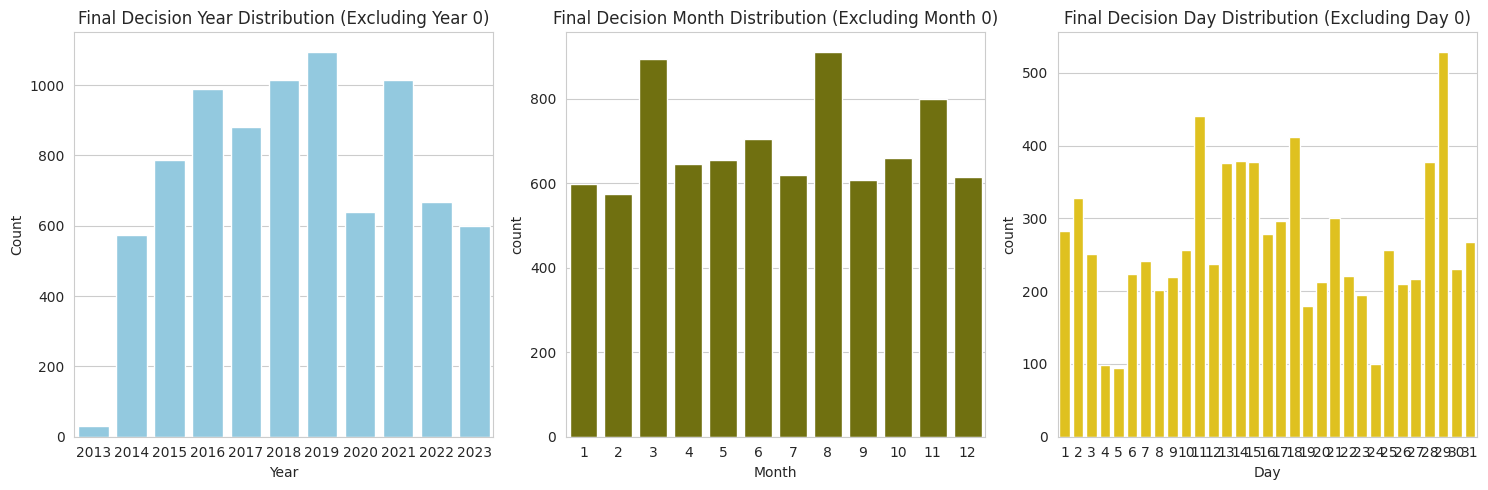

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Countplot for Final Decision Date Year (excluding year 0)
plt.subplot(1, 3, 1)
sns.countplot(x='fd_year', data=df[df['fd_year'] != 0], color="skyblue")
plt.title('Final Decision Year Distribution (Excluding Year 0)')
plt.xlabel('Year')
plt.ylabel('Count')

# Countplot for Final Decision Date Month (excluding month 0)
plt.subplot(1, 3, 2)
sns.countplot(x='fd_month', data=df[df['fd_month'] != 0], color="olive")
plt.title('Final Decision Month Distribution (Excluding Month 0)')
plt.xlabel('Month')

# Countplot for Final Decision Date Day (excluding day 0)
plt.subplot(1, 3, 3)
sns.countplot(x='fd_day', data=df[df['fd_day'] != 0], color="gold")
plt.title('Final Decision Day Distribution (Excluding Day 0)')
plt.xlabel('Day')

plt.tight_layout()
plt.show()


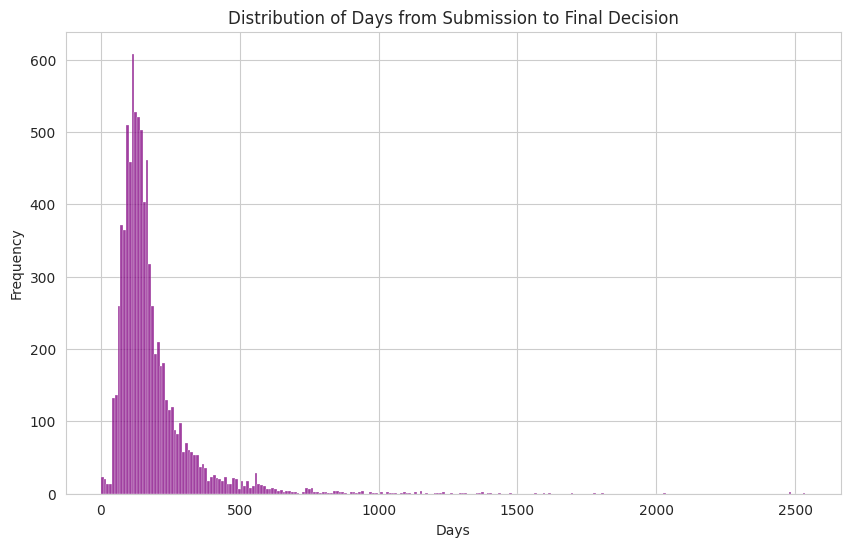

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the histogram for Submission to Final Decision
sns.histplot(df.loc[df.final_submitted > 0]['final_submitted'], kde=False, color="purple")
plt.title('Distribution of Days from Submission to Final Decision')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


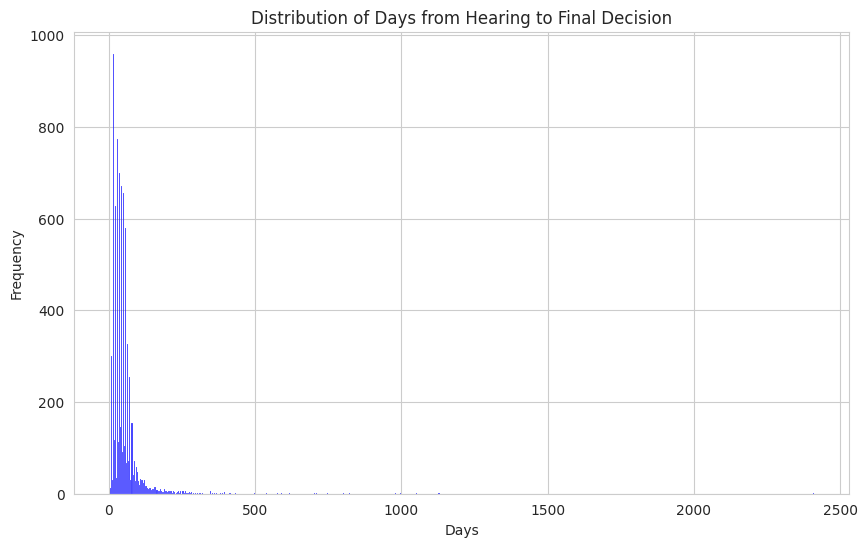

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plotting the histogram for Hearing to Final Decision
sns.histplot(df.loc[df.final_hearing > 0]['final_hearing'], kde=False, color="blue")
plt.title('Distribution of Days from Hearing to Final Decision')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

## 8. decision

In [ ]:
df.decision.sample(5)

1277    Approved
8043    Approved
4662    Approved
8666      Denied
6867    Approved
Name: decision, dtype: object

In [ ]:
df.decision.unique()

array([nan, 'Withdrawn', 'Approved', 'Denied'], dtype=object)

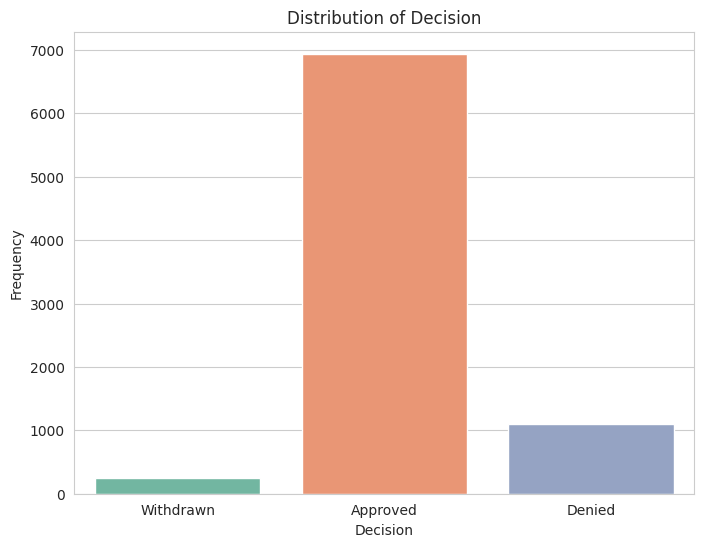

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Plotting the count plot for decision
sns.countplot(x='decision', data=df.loc[df.decision.notna()], palette="Set2")
plt.title('Distribution of Decision')
plt.xlabel('Decision')
plt.ylabel('Frequency')
plt.show()

## 9. closed_date

The date when the appeal is closed in ISD's system, leading to a result for the
parent application.

In [ ]:
df.closed_date.sample(5)

7888    2015-10-19
6314    2017-02-01
4450    2018-11-16
499     2023-06-09
2068    2021-09-08
Name: closed_date, dtype: object

In [ ]:
df.closed_date.isnull().sum()

729

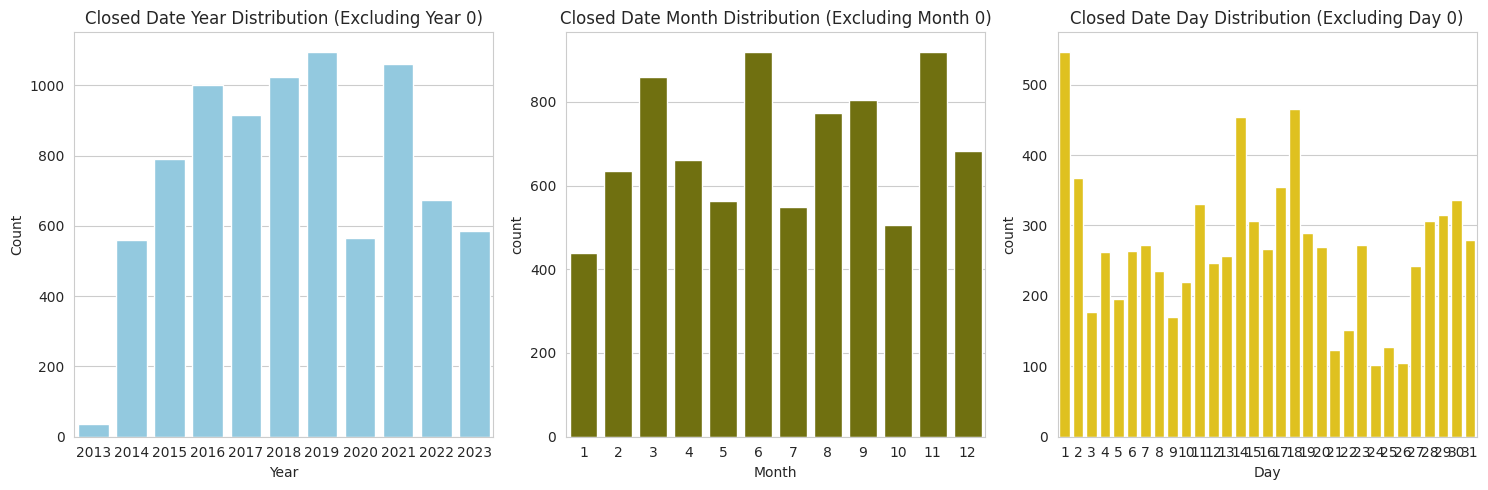

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))

# Countplot for Closed Date Year (excluding year 0)
plt.subplot(1, 3, 1)
sns.countplot(x='cd_year', data=df[df['cd_year'] != 0], color="skyblue")
plt.title('Closed Date Year Distribution (Excluding Year 0)')
plt.xlabel('Year')
plt.ylabel('Count')

# Countplot for Closed Date Month (excluding month 0)
plt.subplot(1, 3, 2)
sns.countplot(x='cd_month', data=df[df['cd_month'] != 0], color="olive")
plt.title('Closed Date Month Distribution (Excluding Month 0)')
plt.xlabel('Month')

# Countplot for Closed Date Day (excluding day 0)
plt.subplot(1, 3, 3)
sns.countplot(x='cd_day', data=df[df['cd_day'] != 0], color="gold")
plt.title('Closed Date Day Distribution (Excluding Day 0)')
plt.xlabel('Day')

plt.tight_layout()
plt.show()


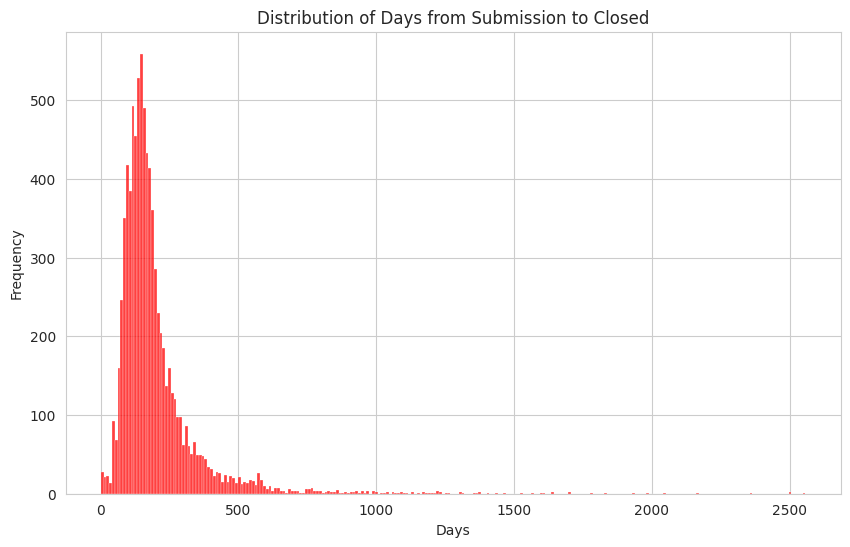

In [ ]:
sns.set_style("whitegrid")

# Histogram for Days from Submission to Closed
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[df.closed_submitted > 0]['closed_submitted'], kde=False, color="red")
plt.title('Distribution of Days from Submission to Closed')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


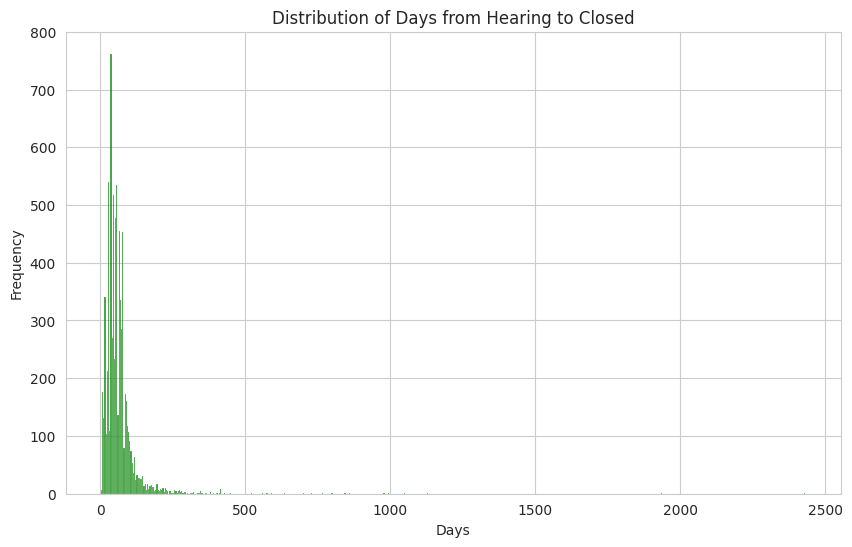

In [ ]:
sns.set_style("whitegrid")

# Histogram for Days from Hearing to Closed
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[df.closed_hearing > 0]['closed_hearing'], kde=False, color="green")
plt.title('Distribution of Days from Hearing to Closed')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

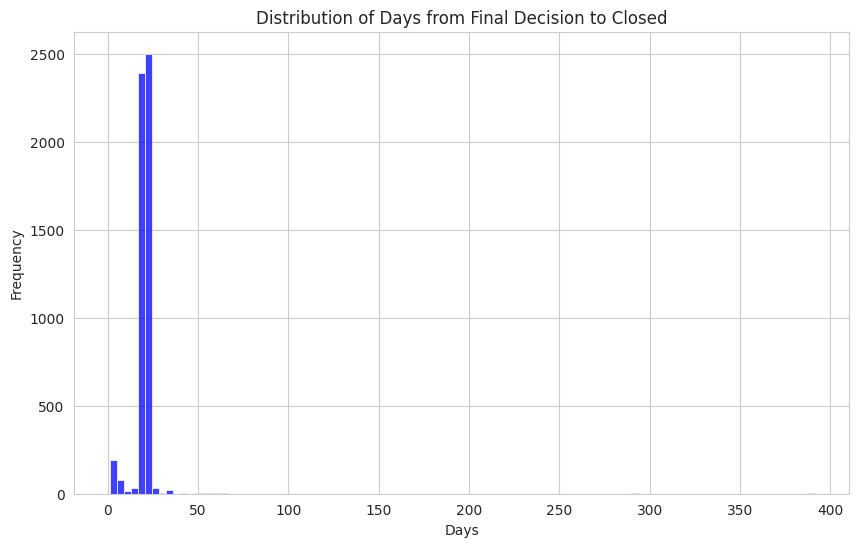

In [ ]:
sns.set_style("whitegrid")

# Histogram for Days from Final Decision to Closed
plt.figure(figsize=(10, 6))
sns.histplot(df.loc[df.closed_final > 0]['closed_final'], bins=100, kde=False, color="blue")
plt.title('Distribution of Days from Final Decision to Closed')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

## 10. city

In [ ]:
df.city.sample(5)

4531     Mattapan
6694       Boston
1694    Hyde Park
6888      Roxbury
637      Brighton
Name: city, dtype: object

In [ ]:
df.city.nunique()

28

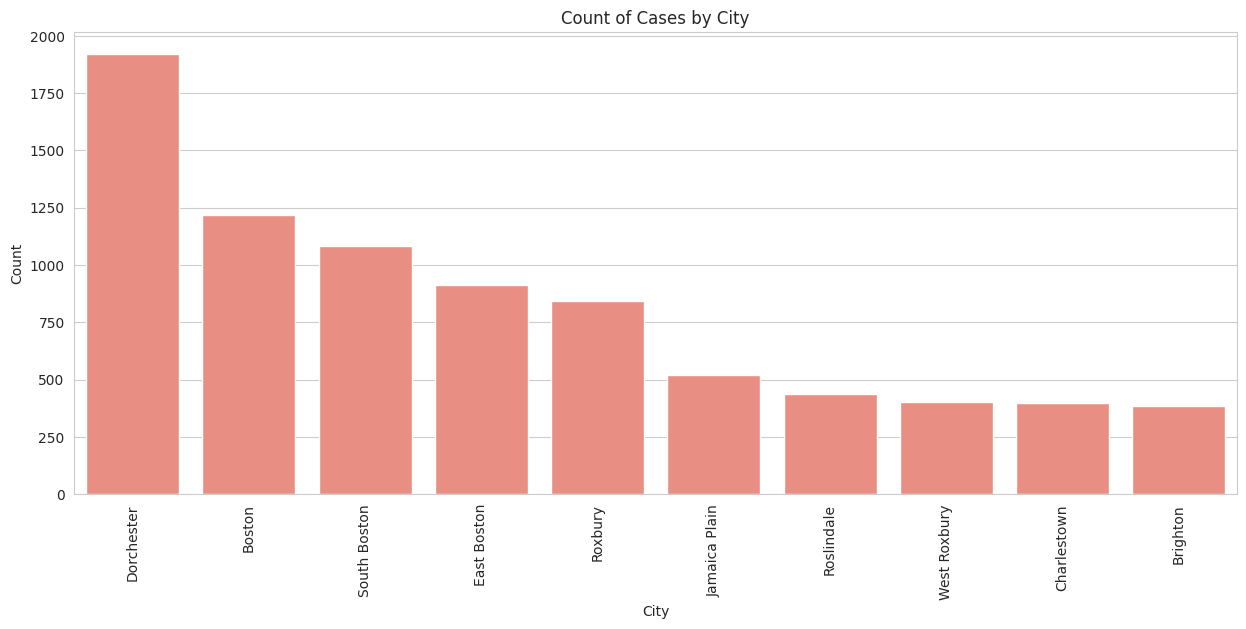

In [ ]:
plt.figure(figsize=(15, 6))

sns.countplot(x='city', data=df, order=df['city'].value_counts().nlargest(10).index, color='salmon')
plt.title('Count of Cases by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## 11. zip

In [ ]:
df.zip.sample(5)

2954    2118
3910    2128
8329    2108
4329    2118
6413    2132
Name: zip, dtype: int64

In [ ]:
df.zip.nunique()

31

In [ ]:
df.zip.isnull().sum()

0

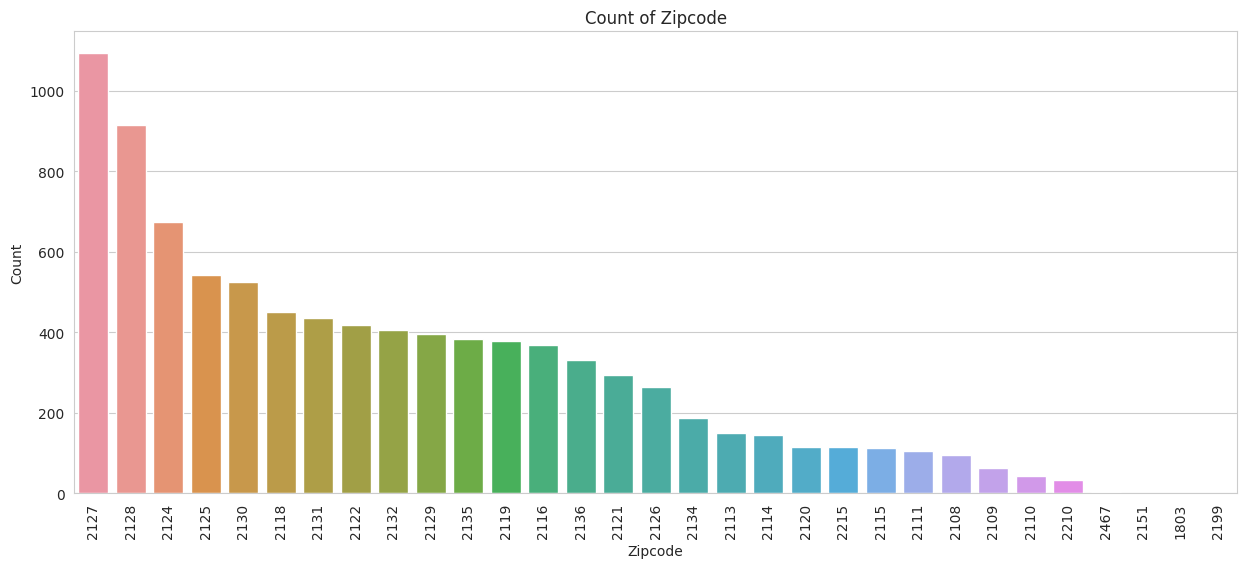

In [ ]:
plt.figure(figsize=(15, 6))

sns.countplot(x='zip', data=df, order=df['zip'].value_counts().index)
plt.title('Count of Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## 12. ward

In [ ]:
df.ward.sample(5)

4965     1
1597     5
8251    12
2540    22
4577     8
Name: ward, dtype: int64

In [ ]:
df.ward.nunique()

22

In [ ]:
df.ward.unique()

array([19,  1, 21, 20, 22, 17,  3,  5,  6, 10, 16, 11, 15, 18, 14,  9,  7,
       12, 13,  2,  8,  4])

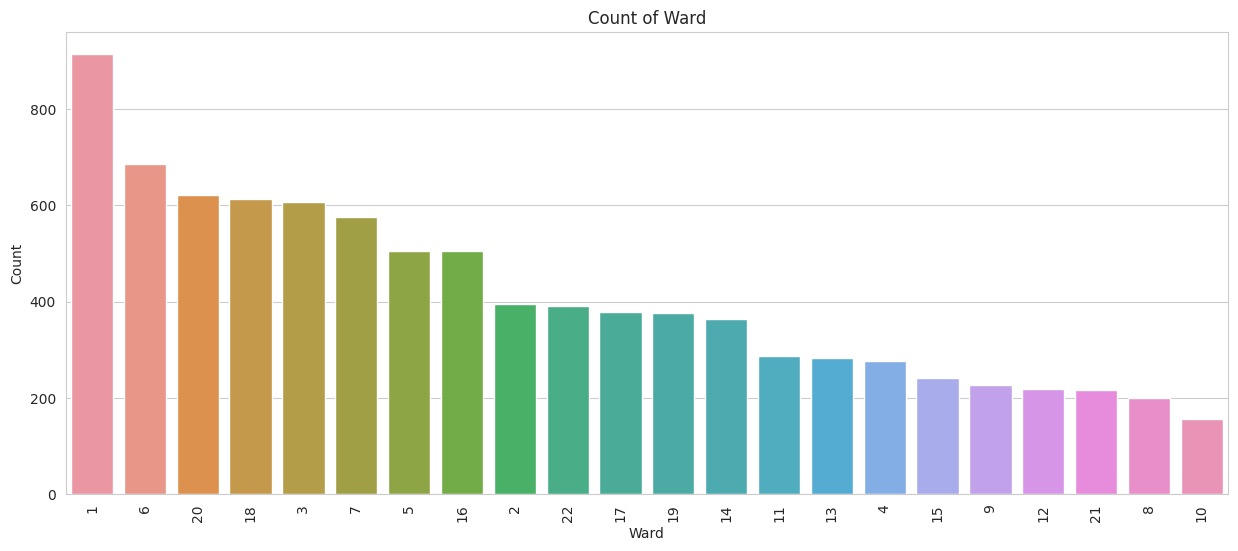

In [ ]:
plt.figure(figsize=(15, 6))

sns.countplot(x='ward', data=df, order=df['ward'].value_counts().index)
plt.title('Count of Ward')
plt.xlabel('Ward')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## 13. zoning_district

In [ ]:
df.zoning_district.sample(5)

149       East Boston
8740          Roxbury
4990      East Boston
7859       Dorchester
4087    Jamaica Plain
Name: zoning_district, dtype: object

In [ ]:
df.zoning_district.nunique()

37

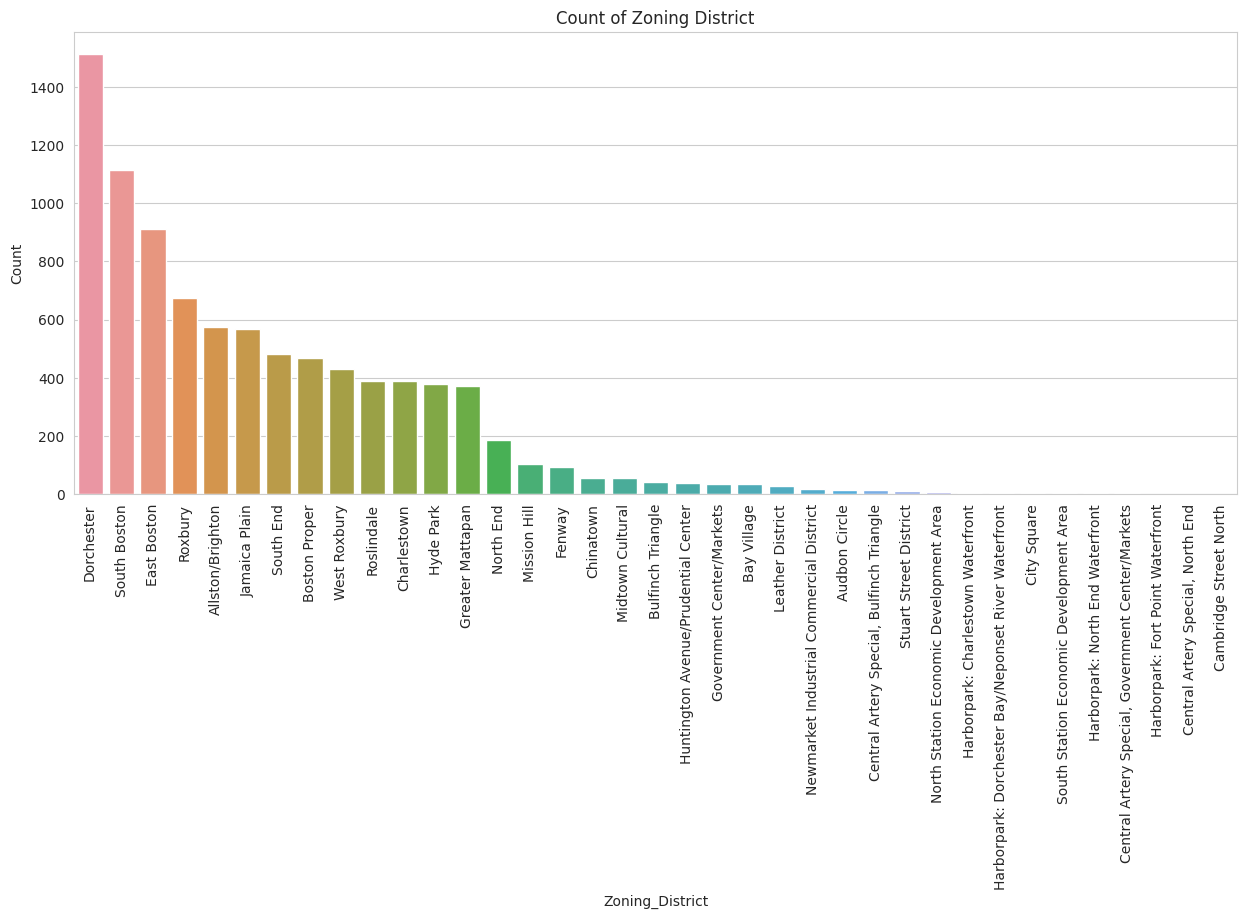

In [ ]:
plt.figure(figsize=(15, 6))  # You can adjust the size to fit your data

sns.countplot(x='zoning_district', data=df, order=df['zoning_district'].value_counts().index)
plt.title('Count of Zoning District')
plt.xlabel('Zoning_District')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating the labels to make them readable
plt.show()

## 14. project_description

Brief description of the proposed scope of work of the parent application. Note that
any part of this work could have resulted in the zoning denial.

In [ ]:
df.project_description.sample(10)

2411                                                  NaN
5690        curb cut to access parking spaces residential
7059    Demolish existing building build new unit park...
8432                                                  NaN
6532    Subdivide existing Parcel 1100168000 into two ...
8111    Erect storage shed with foundation in Front Ya...
1357    Combine 97 to 99 101 Newbury St be known as Co...
7759    Use premises off street parking residential ve...
1109    Application to allow vehicular access proposed...
1843    CAPITAL ONE BANKING CENTER Change occupancy to...
Name: project_description, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(description for description in df.project_description.dropna())

stopwords = set(STOPWORDS)

additional_stopwords = {'the', 'a', 'am', 'he', 'him', ...}
stopwords.update(additional_stopwords)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

AttributeError: ignored

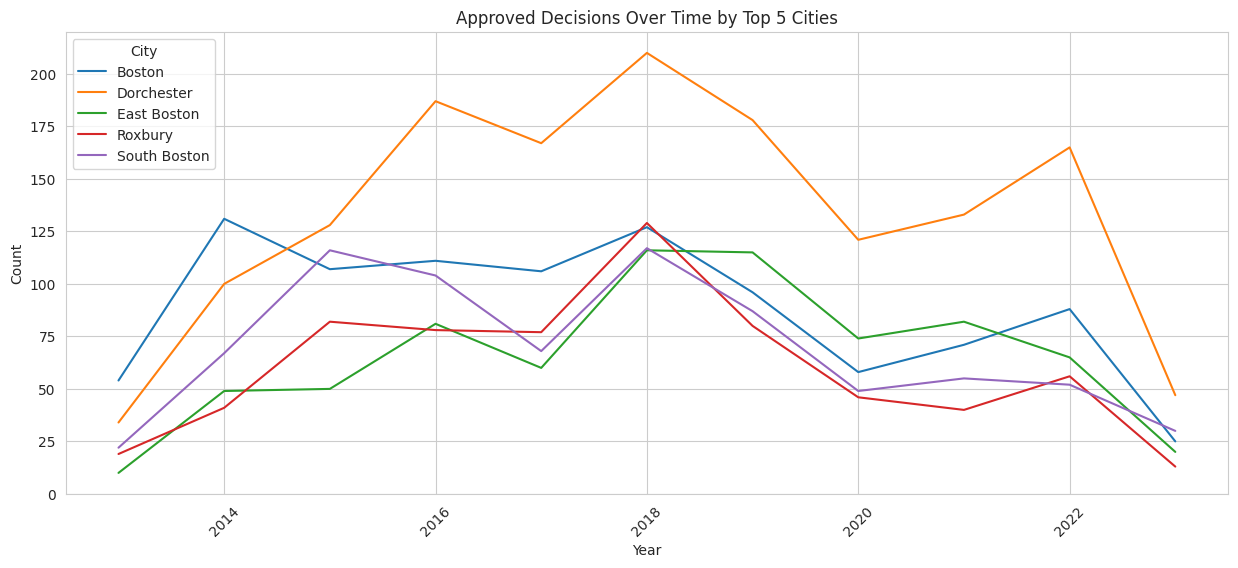

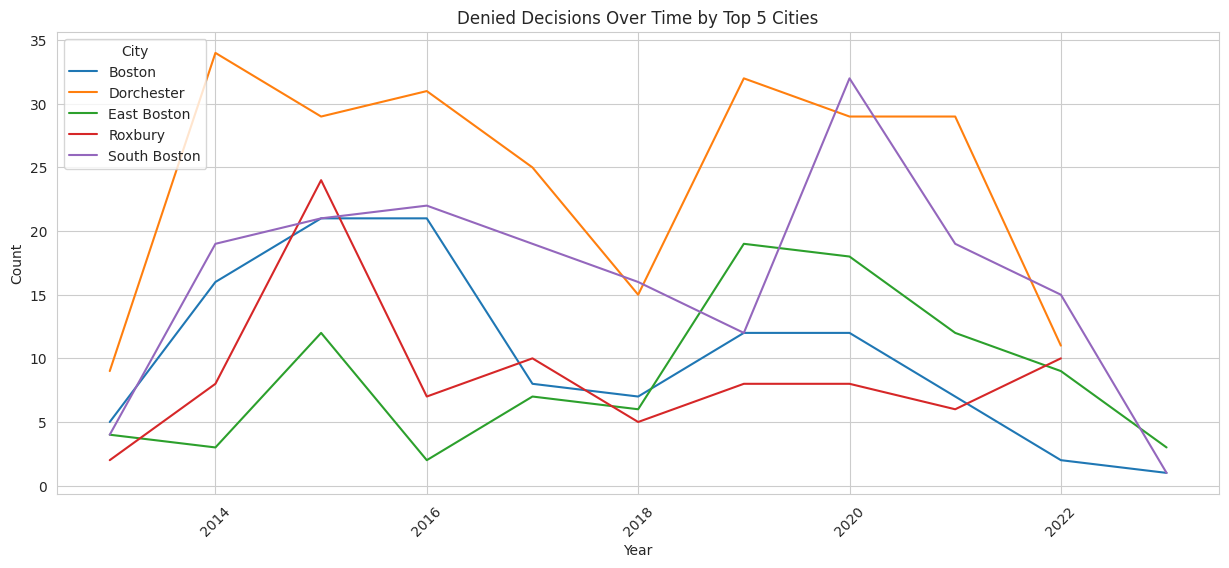

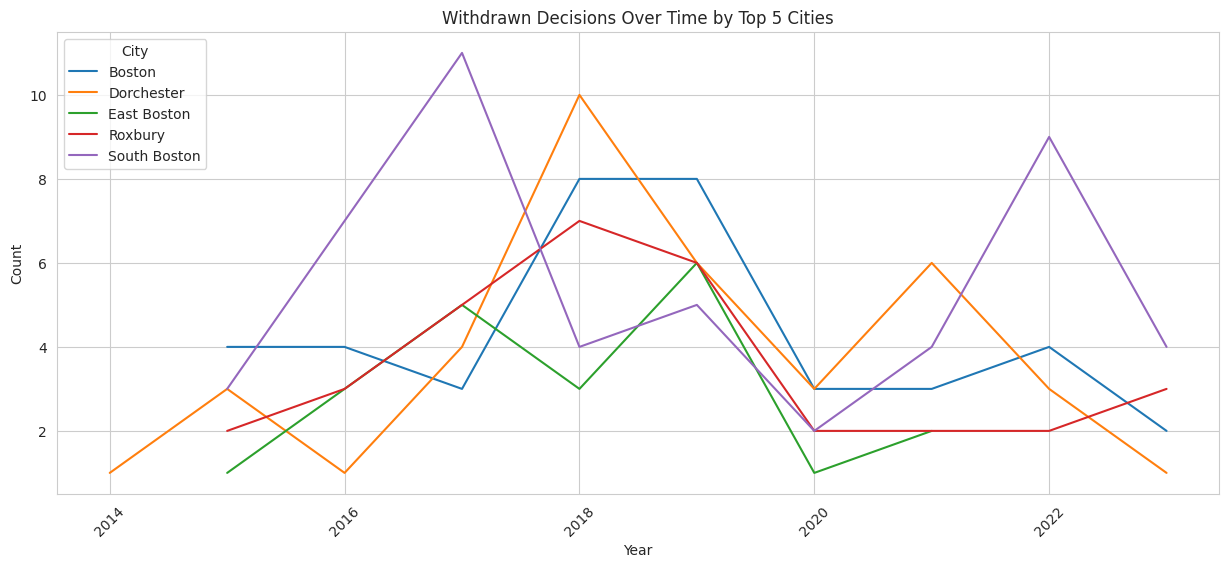

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'grouped_df' is your pre-grouped DataFrame
# Replace this with the actual code or method you're using to create 'grouped_df'
grouped_df = df.groupby(['city', 'sd_year', 'decision']).size().reset_index(name='count')

# Filter the data for each decision type
approved_df = grouped_df[grouped_df['decision'] == 'Approved']
denied_df = grouped_df[grouped_df['decision'] == 'Denied']
other_df = grouped_df[grouped_df['decision'] == 'Withdrawn']  # Replace 'Other' as needed

# Identify top 5 cities for each decision type based on total count
top_approved_cities = approved_df.groupby('city')['count'].sum().nlargest(5).index
top_denied_cities = denied_df.groupby('city')['count'].sum().nlargest(5).index
top_other_cities = other_df.groupby('city')['count'].sum().nlargest(5).index

# Filter data to include only top 5 cities for each decision type
approved_df_top5 = approved_df[approved_df['city'].isin(top_approved_cities)]
denied_df_top5 = denied_df[denied_df['city'].isin(top_denied_cities)]
other_df_top5 = other_df[other_df['city'].isin(top_other_cities)]

# Plotting for 'Approved' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='sd_year', y='count', hue='city', data=approved_df_top5)
plt.title('Approved Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()

# Plotting for 'Denied' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='sd_year', y='count', hue='city', data=denied_df_top5)
plt.title('Denied Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()

# Plotting for 'Withdrawn' - Top 5 Cities
plt.figure(figsize=(15, 6))
sns.lineplot(x='sd_year', y='count', hue='city', data=other_df_top5)
plt.title('Withdrawn Decisions Over Time by Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='City', loc='upper left')
plt.show()
